# 洛伦兹吸引子 
$$ \left\{
\begin{array}{lll}
\dot x  =\sigma (y-x) \\
\dot y  =rx-y-xz    \\
\dot z  =xy-bz
\end{array}
\right.
$$

Here parameters $\sigma , r, b >0$. $\sigma$ is the *Prandtl number* , $r$ is the *Rayleigh number*. $b$ is related to the *aspect ratio of the rolls*.

- 解的对称性

$(x,y) \to (-x,-y)$

- 耗散系统

dissipative: volumes in phase space shrink exponentially fast.

- 不动点

$$ \left\{
\begin{array}{lll}
\dot x  =0 \\
\dot y  =0    \\
\dot z  =0
\end{array}
\right.
$$
that is,
$$ \left\{
\begin{array}{lll}
\sigma (y-x) = 0 \\
rx-y-xz = 0   \\
xy-bz = 0
\end{array}
\right.
$$

fixed points: $(x^*,y^*,z^*)=(0,0,0),(\pm \sqrt{b(r-1)},\pm \sqrt{b(r-1)},r-1)$



- 奇怪吸引子 (strange attrators)

a strange attractor, fractional dimension between $2$ and $3$


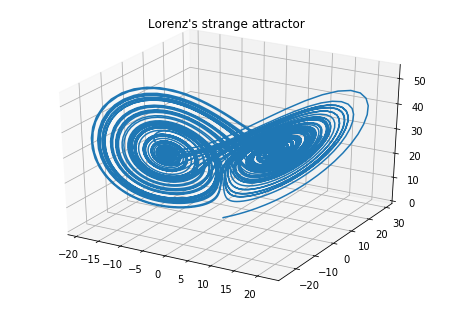

In [15]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

xs, ys, zs = [], [], []


def lorenz():
    a, b, c = 10.0, 28.0, 8.0 / 3.0
    h = 0.01
    x0, y0, z0 = 0.1, 0, 0
    for i in range(10000):
        x1 = x0 + h * a * (y0 - x0)
        y1 = y0 + h * (x0 * (b - z0) - y0)
        z1 = z0 + h * (x0 * y0 - c * z0)
        x0, y0, z0 = x1, y1, z1
        xs.append(x0)
        ys.append(y0)
        zs.append(z0)


if __name__ == "__main__":
    mpl.rcParams["legend.fontsize"] = 10
    fig = plt.figure()
    ax = Axes3D(fig)

    mkPoints()
    ax.plot(xs, ys, zs)
    plt.title("Lorenz's strange attractor")

    plt.show()

Text(0.5,0,'z')

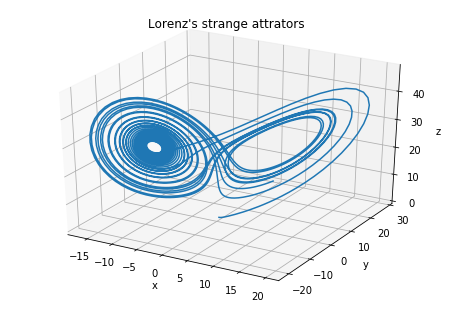

In [25]:
# 改用odeint求解微分方程组
def lorenz(w, t, p, r, b):
    x, y, z = w
    return np.array([p*(y - x), x * (r - z) - y, x * y - b * z])


t = np.arange(0, 30, 0.01)
track = odeint(lorenz, (0.0, 1.01, 0.0), t, args=(10.0, 28.0, 8/3))  # 设定初值和参量

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(track[:, 0], track[:, 1], track[:, 2])


plt.title("Lorenz's strange attrators")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

Text(0.5,0,'z')

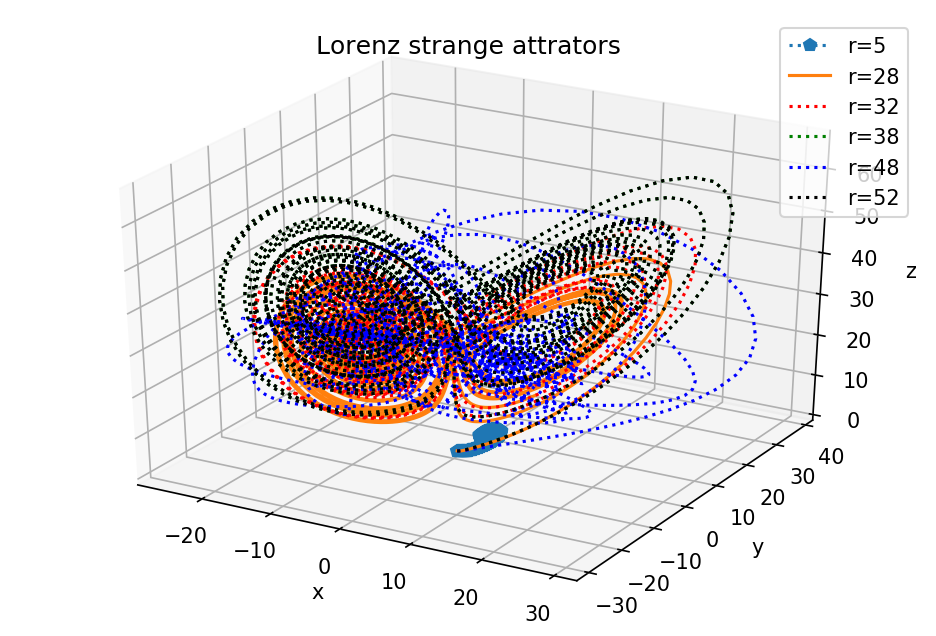

In [48]:
# 改变r的取值
track0 = odeint(lorenz, (0.0, 1.01, 0.0), t, args=(10.0, 5.0, 8.0/3.0))  # r=5
track1 = odeint(lorenz, (0.0, 1.01, 0.0), t,
                args=(10.0, 28.0, 8.0/3.0))  # r=28
track2 = odeint(lorenz, (0.0, 1.01, 0.0), t,
                args=(10.0, 32.0, 8.0/3.0))  # r=32
track3 = odeint(lorenz, (0.0, 1.01, 0.0), t,
                args=(10.0, 38.0, 8.0/3.0))  # r=38
track4 = odeint(lorenz, (0.0, 1.01, 0.0), t,
                args=(10.0, 48.0, 8.0/3.0))  # r=48
track5 = odeint(lorenz, (0.0, 1.01, 0.0), t,
                args=(10.0, 52.0, 8.0/3.0))  # r=52


fig = plt.figure(dpi=150)
ax = Axes3D(fig)
ax.plot(track0[:, 0], track0[:, 1], track0[:, 2], 'p:')
ax.plot(track1[:, 0], track1[:, 1], track1[:, 2])
ax.plot(track2[:, 0], track2[:, 1], track2[:, 2], 'r:')
ax.plot(track3[:, 0], track3[:, 1], track3[:, 2], 'g:')
ax.plot(track4[:, 0], track2[:, 1], track2[:, 2], 'b:')
ax.plot(track3[:, 0], track3[:, 1], track3[:, 2], 'k:')

plt.title("Lorenz strange attrators")
plt.legend(["r=5", "r=28", "r=32", "r=38", "r=48", "r=52"])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

## 做x-y,x-z,y-z的投影图

Text(0,0.5,'$z$')

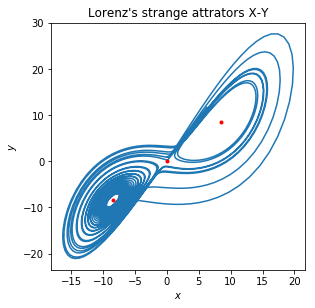

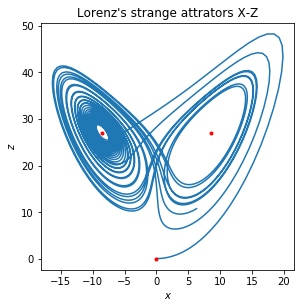

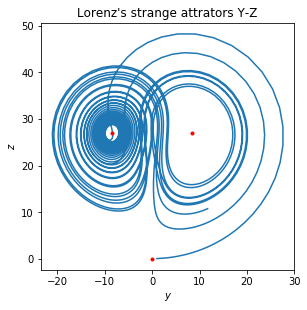

In [44]:
track = odeint(lorenz, (0.0, 1.01, 0.0), t, args=(10.0, 28.0, 8.0/3.0))
args = (10.0, 28.0, 8.0/3.0)
p = args[0]
r = args[1]
b = args[2]

# x-y投影
plt.figure(figsize=(10, 10))
track = plt.subplot(2, 2, 1)
track.plot(track1[:, 0], track1[:, 1])
track.plot(0, 0, 'r.')
track.plot(np.sqrt(b*(r-1)), np.sqrt(b*(r-1)), 'r.')
track.plot(-np.sqrt(b*(r-1)), -np.sqrt(b*(r-1)), 'r.')
plt.title("Lorenz's strange attrators X-Y")
plt.xlabel("$x$")
plt.ylabel("$y$")

# x-z投影
plt.figure(figsize=(10, 10))
ax2 = plt.subplot(2, 2, 2)
ax2.plot(track1[:, 0], track1[:, 2])
ax2.plot(0, 0, 'r.')
ax2.plot(np.sqrt(b*(r-1)), r-1, 'r.')
ax2.plot(-np.sqrt(b*(r-1)), r-1, 'r.')
plt.title("Lorenz's strange attrators X-Z")
plt.xlabel("$x$")
plt.ylabel("$z$")

# y-z投影
plt.figure(figsize=(10, 10))
ax2 = plt.subplot(2, 2, 3)
ax2.plot(track1[:, 1], track1[:, 2])
ax2.plot(0, 0, 'r.')
ax2.plot(np.sqrt(b*(r-1)), r-1, 'r.')
ax2.plot(-np.sqrt(b*(r-1)), r-1, 'r.')
plt.title("Lorenz's strange attrators Y-Z")
plt.xlabel("$y$")
plt.ylabel("$z$")

## x对t的变化关系

Text(0,0.5,'x')

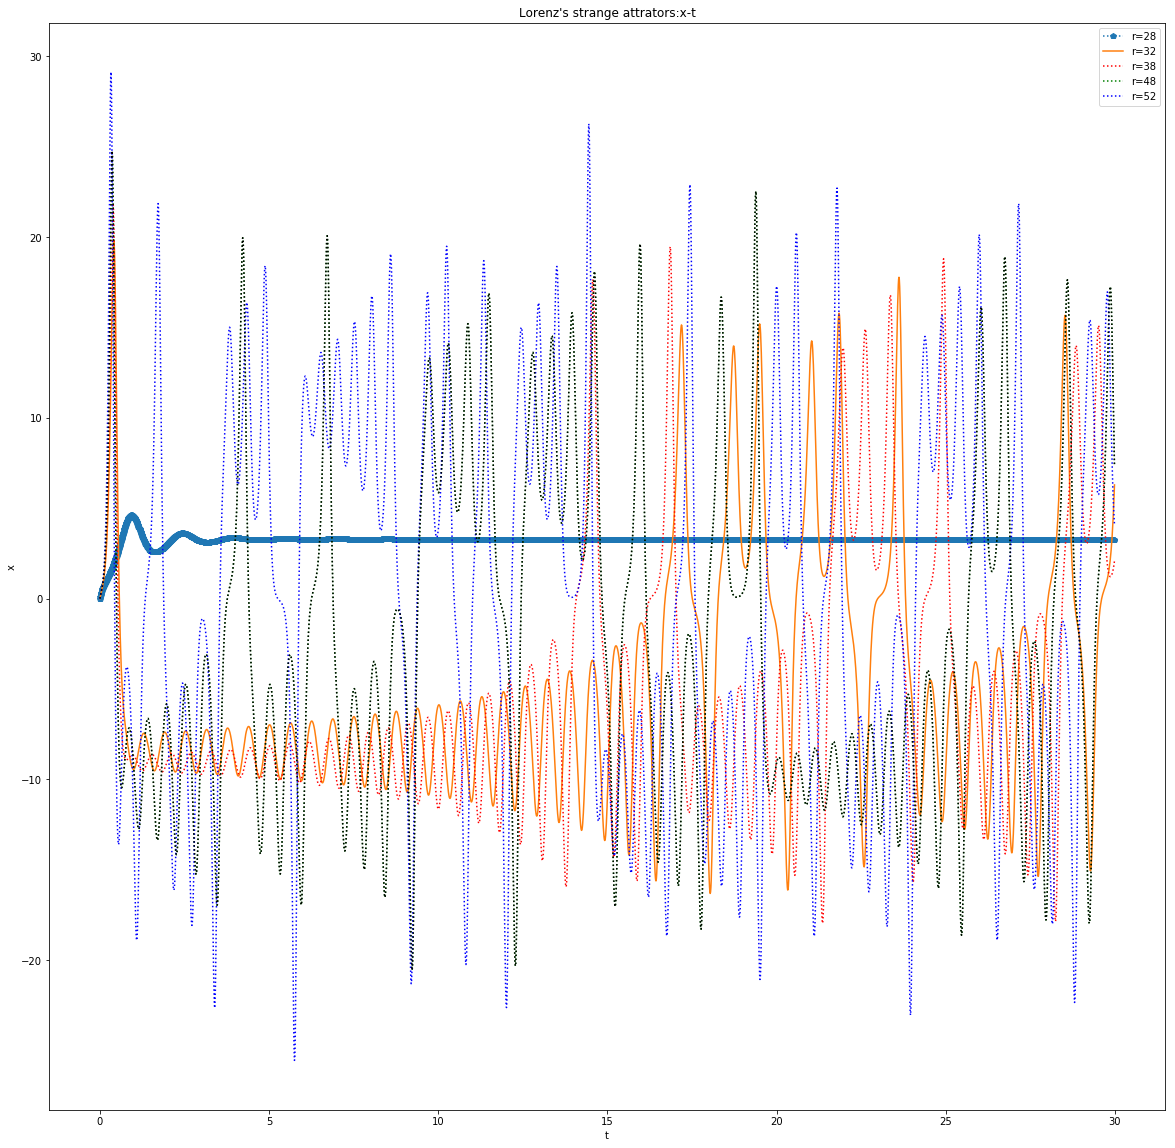

In [49]:
plt.figure(figsize=(20, 20))
plt.plot(t, track0[:, 0], 'p:')
plt.plot(t, track1[:, 0], )
plt.plot(t, track2[:, 0], 'r:')
plt.plot(t, track3[:, 0], 'g:')
plt.plot(t, track4[:, 0], 'b:')
plt.plot(t, track3[:, 0], 'k:')
plt.title("Lorenz's strange attrators:x-t")
plt.legend(["r=28", "r=32", "r=38", "r=48", "r=52"])
plt.xlabel("t")
plt.ylabel("x")

可见，r＞28时，全部为混沌状态
r=5为稳定状态